<a href="https://colab.research.google.com/github/Bolorooo24/CV-ML_labs/blob/main/Pytorch-deep-learning/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch workflow

Let's explore a an example pytorch end-to-end workflow

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1]:
what_were_covering = {1: "data prepare and load",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model",
                      5: "save and load a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data prepare and load',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model',
 5: 'save and load a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

## 1. Data preparing and loading
Data can be almost anything.. in machine learning

* excel spreadsheet
* images  
* vidoes
* audio
* dna
* text

Machine learning is a game of two parts:
1. get data into a numerical Representation
2. build a model to learn patterns

Let's create some data.

We'll use a linear regression formula to make straight line with known parameters


In [3]:
#create known parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02

# capital letter is matrix/tensor, lower letter is a vector
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

Let's create a training and test set our data



In [5]:
# create a train/test split

train_split= int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visiualize out data?



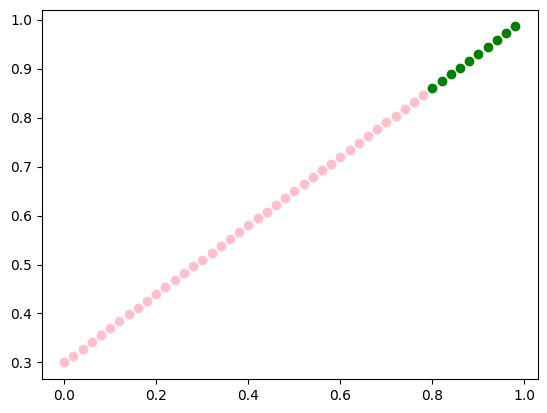

In [6]:
plt.scatter(X_train, y_train, color="pink")

plt.scatter(X_test, y_test, color="green")

plt.show()

In [7]:
def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions =None):
  """
  Plots training and test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # plot trainin data in blue

  plt.scatter(train_data, train_labels, c="b", s=4, label = "training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label = "test data")

  # are there predictions?
  if predictions is not None:
    # plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label = "predictions")

  # show the legend
  plt.legend(prop={"size":14});



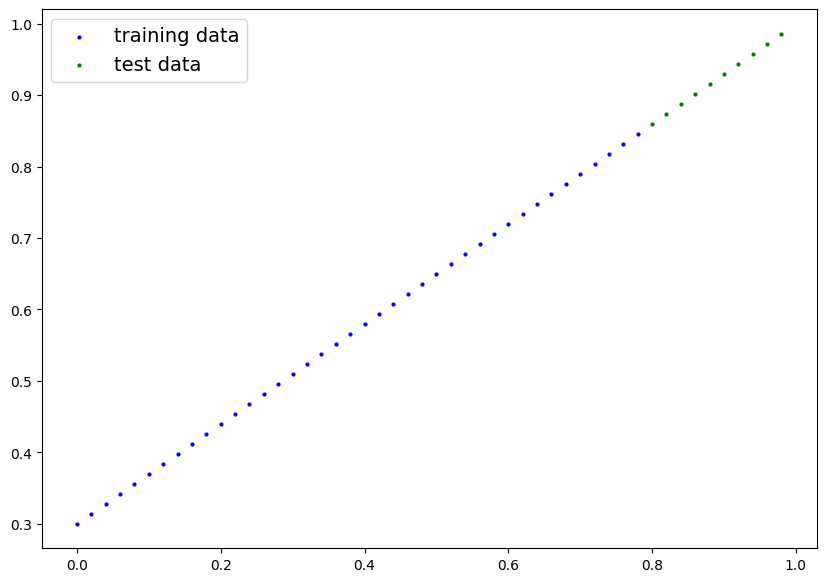

In [8]:
plot_predictions()

## 2. Build model

Our first Pytorch model

Because we're going to be building classes, we'd recommend getting familiar with OOP in Python, to do so you can use following resources: https://realpython.com/python3-object-oriented-programming/


What our model does?
* start with random val
* look at training data and adjust the random values to better represent the ideal values (the w&b values  we used to create the data)

How does it do so?
Through 2 main algo:

1. gradient descent - https://youtu.be/IHZwWFHWa-w?si=GZASXYIm1VIiAap2
2. backpropagation - https://youtu.be/Ilg3gGewQ5U?si=ViOh5BZhVs9RgRPx|

In [9]:
from torch import nn
# create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything is build based on nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # start with random weights and try to adjust it to the ideal weight
                                            requires_grad=True, # can this parameter be updated via gradient descent
                                            dtype=torch.float)) # pytorch loves the datatype torch.float32
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    # forward method to define the computation in the model

  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # this is the linear regression model



### Pytorch model building essentials
* torch.nn - contains all of the buildings for computational grahps
* nn.Parameter - what parameters should our model try and learn often a pytroch sets for us
* nn.Module - base class for all nn modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizes the model which helps with gradient Descent
* def forward() - all nn.module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


Pytroch essentials: https://docs.pytorch.org/tutorials/beginner/pytorch_with_examples.html


### Checking the contents of our pytorch model

So we can check our model parameters or what's inside our model using .parameters()

In [10]:
# creaet a random seed
torch.manual_seed(42)

# create an instance of the model this is a subclass of nn.Module
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# list named params
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using torch.inference_model

to check our model's predictive power, let's see how well it predicts y_test based on X_test
when we pass data through our model, it's going to run it through the forward() method.

In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [13]:
# make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

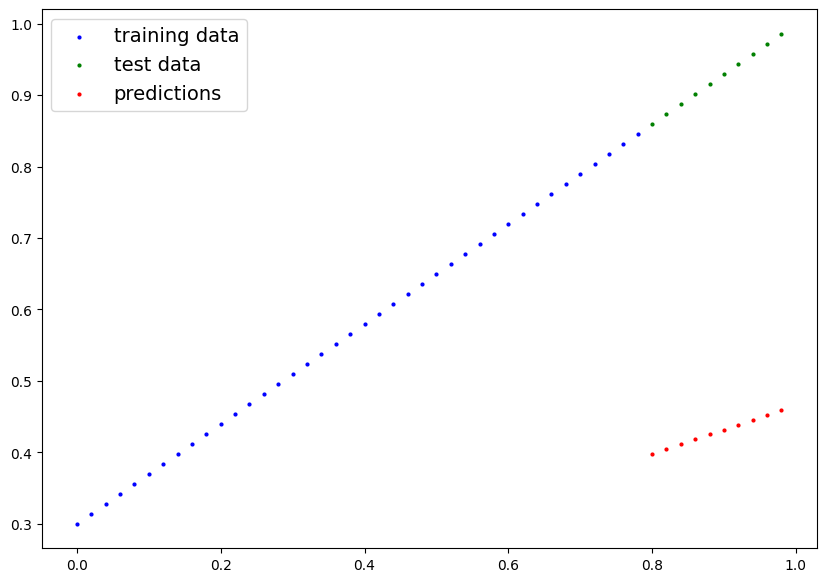

In [14]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a mdoel to move from random parameters to some known parameters
Or from a poor reprenstation of the data to a better representation of the data


One way to measure how poor or how wrong your predictions are a loss functions.- https://docs.pytorch.org/docs/stable/nn.html#loss-functions

* loss function may also be called cost function.


Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs. Lower is better
* **Optimizer:** Takes into account the loss of a mdoel and adjusts the model's parameters (weights&biases) to improve the loss function.
1. Inside the optimizer you'll often have to set two parameters:
* params - the model parameters you'd like to optimize
* ls - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step

And specialy for Pytorch, we need:
* training loop
* testing loop

In [15]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict() # with label

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

**Q:** Which loss function and optimizer should i use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem like ours, a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice.

But for a classification problem like classyfing whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BCELoss() binary cross entropy loss.

### Builing a training loop in PyTorch
A couple of thiengs we need in trianing loop:
0. Loop trhough the data
1. Forward pass (this involves data moving through our model's forward() functions ) - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our mdoel with the loss /**backpropagation**/
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss /**gradient descent**/

In [18]:
torch.manual_seed(42)
# an epoch is one loop through the data
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# loop through the data

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # set the mdoel to training mode
  model_0.train() # train mode in pytorch set all parameters that require to require

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward -perform backpropagation on the loss with respect to the pararms of the model
  loss.backward()

  # 5. Optimizer step
  optimizer.step() # by default the optimizer changes will accumulate through the loop so.. we have to zero them above in step 3


  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/barch norm layers)
  with torch.inference_mode(): # turns off gradient tracking
  # with torch.no_grad(): # you may also see torch.no_grad() in older pytroch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.03

/tmp/ipython-input-193336161.py:2: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="train loss")


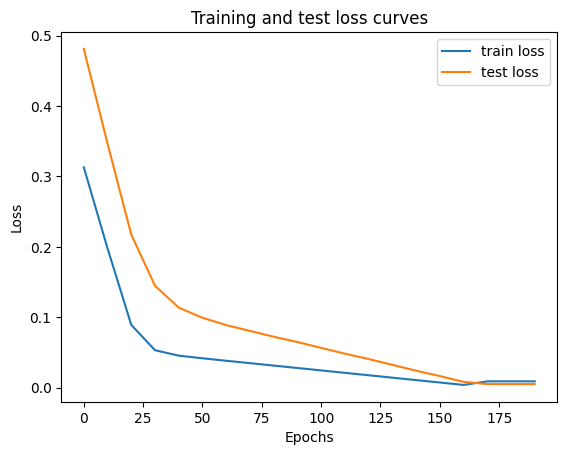

In [19]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [20]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)



In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

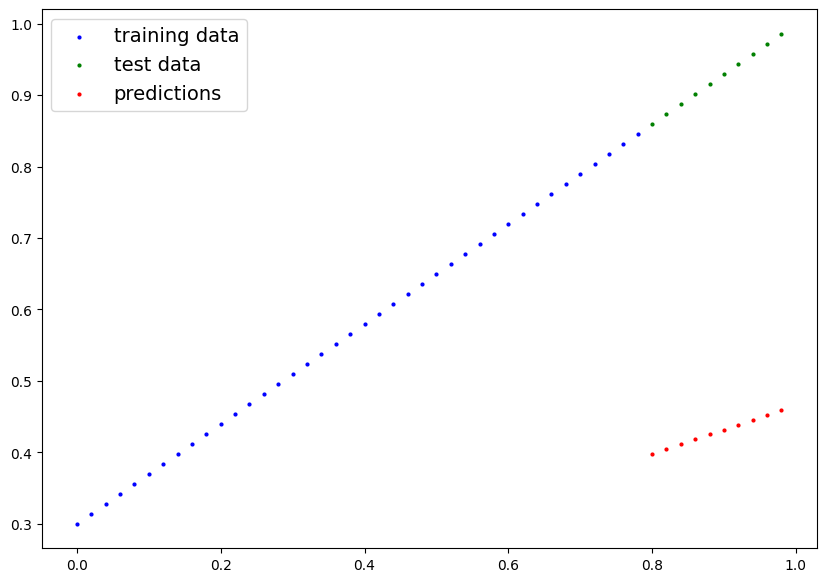

In [22]:
plot_predictions(predictions = y_preds)

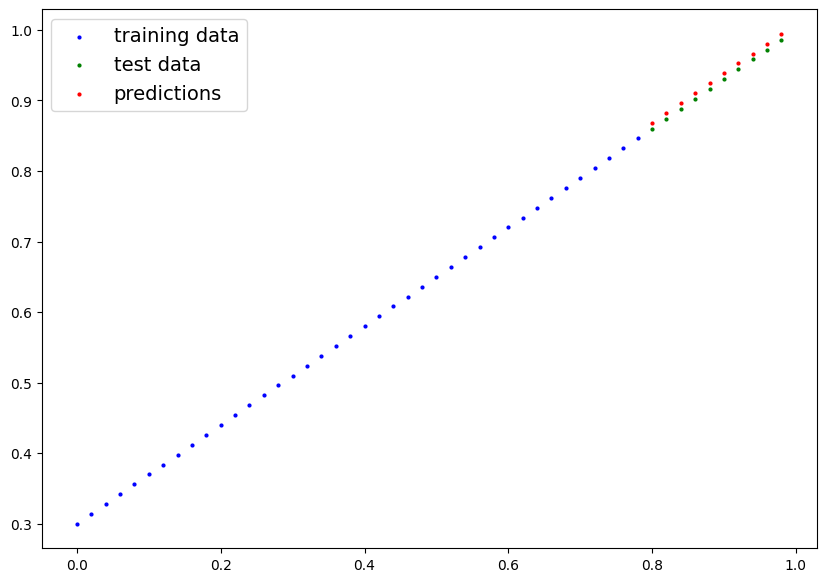

In [23]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are 3 main methods you should know about for saving and loading models in PyTorch.

1. 'torch_save()' - allows you save a Pytorch object in python's pickle format.
2. 'torch.load()' - allows you load a saved Pytorch  object
3. 'torch.nn.Module.load_state_dict()' - allows to load a model's saved state dictionary

Pytorch save & load code tutorial, Learn more: https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html


In [24]:
# saving our pytorch model
from pathlib import Path

# 1. create models directory

MODEL_PATH  = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model in state_dict()
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to : models/01_pytorch_workflow_model_0.pth


In [25]:
!ls -l models

total 4
-rw-r--r-- 1 root root 2117 Oct 27 23:37 01_pytorch_workflow_model_0.pth


## Loading a pytroch model

Since we saved our model's state_dict() rather the entire model, we'll create a new instance of our model class and load the saved 'state_dict()' into that.

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
# to load in a save state_dict we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# load the save state_dict of model_0 this will update the new instance with updated parameters
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
from pickle import load
# make some predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [30]:
# compare loaded model preds with originial model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together
Let's go back through the steps above and see it all in one place


In [31]:
# imprt pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__

'2.8.0+cu126'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it for potentially faster computing.else
If no GPU is available, the code will default to using CPU.

In [32]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [33]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### 6.1 Data

In [34]:
# create some data using the linear regression formula y = weight * X + bias

weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create X and y (features and labels)

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [35]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

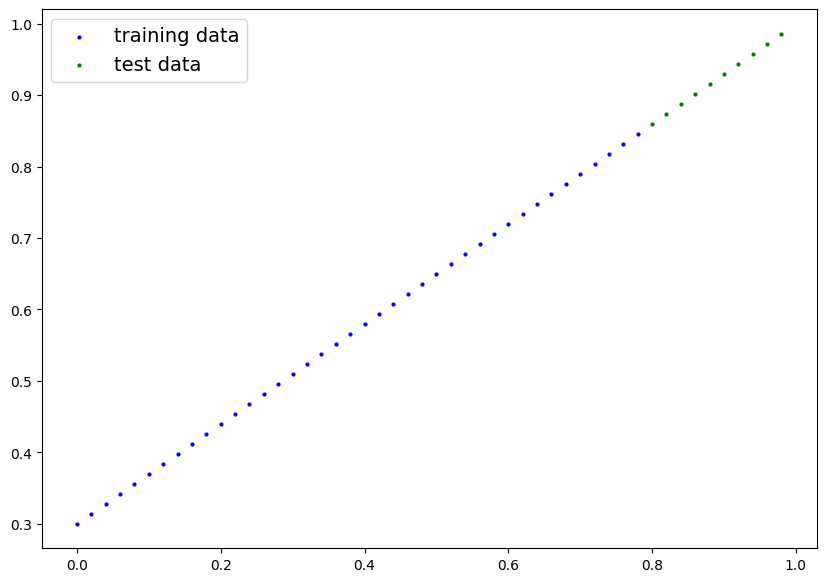

In [36]:
# plot the data
# note: if you don't have plot_prediciton function loaded,this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a pytorch linear model

In [37]:
## create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.linear() for creating the model params
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [38]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [39]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [40]:
# setup the loss function
loss_fn = nn.L1Loss()

# setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)


In [42]:
# let's write a training loop
torch.manual_seed(42)

epochs = 200
# put data on the target device (device agnostic code for data)

# X_train = X_train.to(device)
# y_train = y_train.to(device)
# X_test = X_test.to(device)
# y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backprpagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)
  # print our what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5436569452285767 | Test Loss: 0.5605052709579468
Epoch: 10 | Loss: 0.42844706773757935 | Test Loss: 0.42579537630081177
Epoch: 20 | Loss: 0.31323719024658203 | Test Loss: 0.2910855710506439
Epoch: 30 | Loss: 0.1980273276567459 | Test Loss: 0.1563757359981537
Epoch: 40 | Loss: 0.0828174576163292 | Test Loss: 0.021665919572114944
Epoch: 50 | Loss: 0.023356426507234573 | Test Loss: 0.048834484070539474
Epoch: 60 | Loss: 0.019609849900007248 | Test Loss: 0.04538799077272415
Epoch: 70 | Loss: 0.01618141308426857 | Test Loss: 0.03711546212434769
Epoch: 80 | Loss: 0.012742981314659119 | Test Loss: 0.028842901811003685
Epoch: 90 | Loss: 0.0093079237267375 | Test Loss: 0.02125726267695427
Epoch: 100 | Loss: 0.005878164432942867 | Test Loss: 0.012984687462449074
Epoch: 110 | Loss: 0.002439356641843915 | Test Loss: 0.004712158348411322
Epoch: 120 | Loss: 0.010256484150886536 | Test Loss: 0.0003308236482553184
Epoch: 130 | Loss: 0.010256484150886536 | Test Loss: 0.00033082364825

In [58]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [59]:
### 6.4 Making and evaluation mode

model_1.eval()

# make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]])

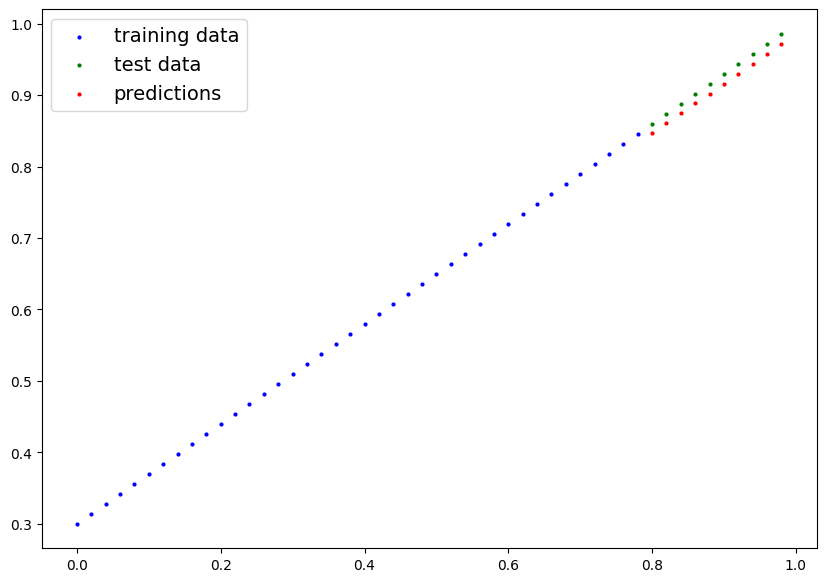

In [60]:
# check out our model predictions visually
plot_predictions(predictions=y_preds)

### 6.5 Saving and loading a trained model

In [61]:
from pathlib import Path
# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok = True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_1.pth


In [62]:
# load a pytorch

# create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [63]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [64]:
loaded_model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [65]:
# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])